<a href="https://colab.research.google.com/github/AvK1002/Pandas-Task/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/House_Pricing.csv')


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer



In [ ]:
median_imputer = SimpleImputer(strategy='median')
data['Sale Price'] = median_imputer.fit_transform(data[['Sale Price']])
data['Flat Area (in Sqft)'] = median_imputer.fit_transform(data[['Flat Area (in Sqft)']])
data['Latitude'] = median_imputer.fit_transform(data[['Latitude']])
data['Longitude'] = median_imputer.fit_transform(data[['Longitude']])



In [ ]:
median_imputer = SimpleImputer(strategy='median')
data['No of Bathrooms'] = median_imputer.fit_transform(data[['No of Bathrooms']])
data['Lot Area (in Sqft)'] = median_imputer.fit_transform(data[['Lot Area (in Sqft)']])
data['Area of the House from Basement (in Sqft)'] = median_imputer.fit_transform(data[['Area of the House from Basement (in Sqft)']])
data['Living Area after Renovation (in Sqft)'] = median_imputer.fit_transform(data[['Living Area after Renovation (in Sqft)']])


In [ ]:
mode_imputer = SimpleImputer(strategy='most_frequent')
data['Zipcode'] = mode_imputer.fit_transform(data[['Zipcode']])


In [ ]:
data.isnull().sum()


,0
ID,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
No of Times Visited,19489


In [ ]:
data.drop(['No of Times Visited'], axis=1, inplace=True)
data.drop(['ID'], axis=1, inplace=True)


In [ ]:
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [ ]:
data.isnull().sum()

,0
Date House was Sold,0
Sale Price,0
No of Bedrooms,0
No of Bathrooms,0
Flat Area (in Sqft),0
Lot Area (in Sqft),0
No of Floors,0
Waterfront View,0
Condition of the House,0
Overall Grade,0


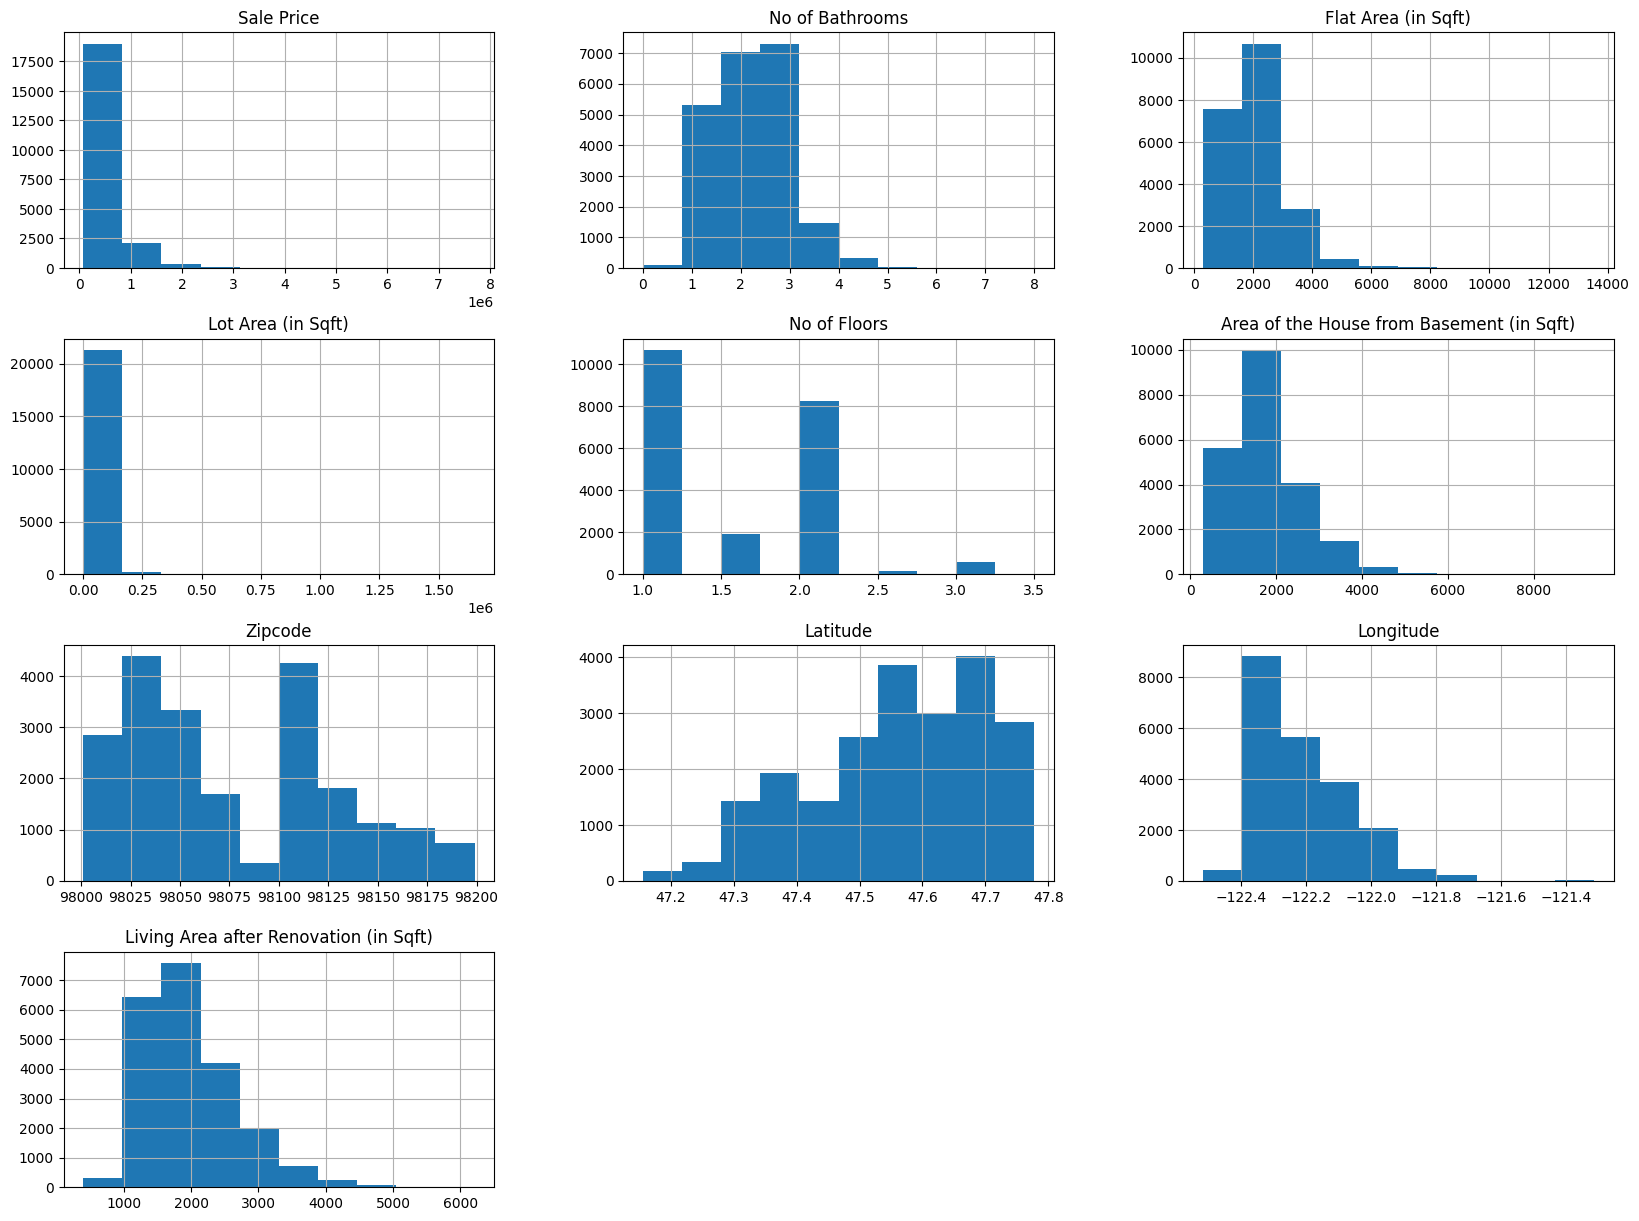

In [ ]:
freqplot = data.select_dtypes(include=['float'])
freqplot.hist(figsize = (20,15))
plt.show()

<Axes: >

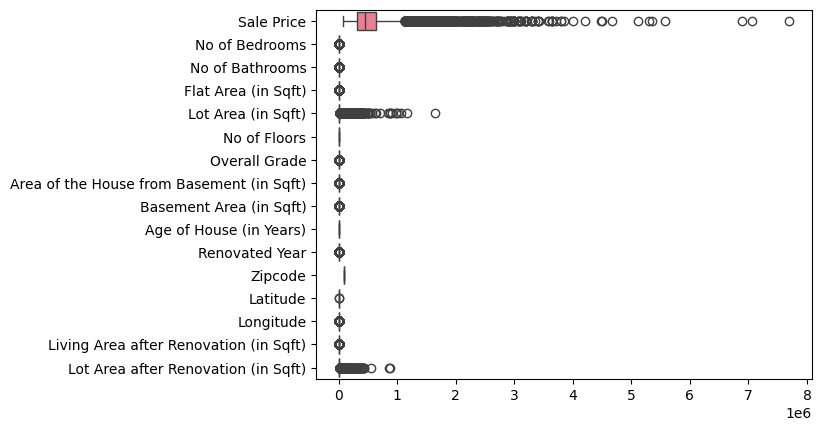

In [ ]:
sns.boxplot(data=data, orient="h")

In [ ]:
outlier_col=[]
for column in data.select_dtypes(include=['number']):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]
    print(f"Number of outliers in {column}: {len(outliers)}")
    count=outliers.shape[0]

    if count>0:
        outlier_col.append(column)
print(outlier_col)

Number of outliers in Sale Price: 1159
Number of outliers in No of Bedrooms: 546
Number of outliers in No of Bathrooms: 571
Number of outliers in Flat Area (in Sqft): 572
Number of outliers in Lot Area (in Sqft): 2423
Number of outliers in No of Floors: 0
Number of outliers in Overall Grade: 1911
Number of outliers in Area of the House from Basement (in Sqft): 610
Number of outliers in Basement Area (in Sqft): 496
Number of outliers in Age of House (in Years): 0
Number of outliers in Renovated Year: 914
Number of outliers in Zipcode: 0
Number of outliers in Latitude: 2
Number of outliers in Longitude: 256
Number of outliers in Living Area after Renovation (in Sqft): 544
Number of outliers in Lot Area after Renovation (in Sqft): 2194
['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Renovated Year', 'Latitude', 'Longitude', 'Living Area after Renovatio

In [ ]:
for column in outlier_col:
  q1=data[column].quantile(0.25)
  q3=data[column].quantile(0.75)
  iqr=q3-q1
  lower_bound=q1-1.5*iqr
  upper_bound=q3+1.5*iqr
  data[column]=data[column].clip(lower=lower_bound,upper=upper_bound)

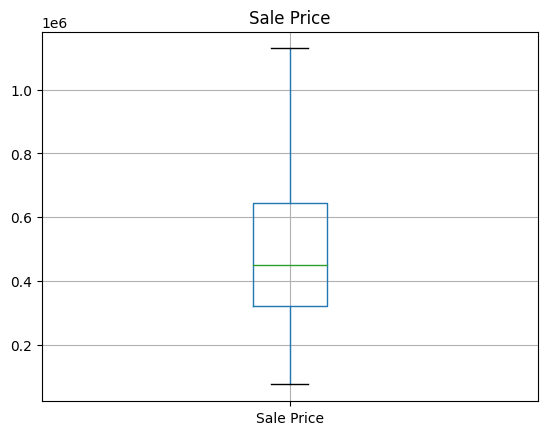

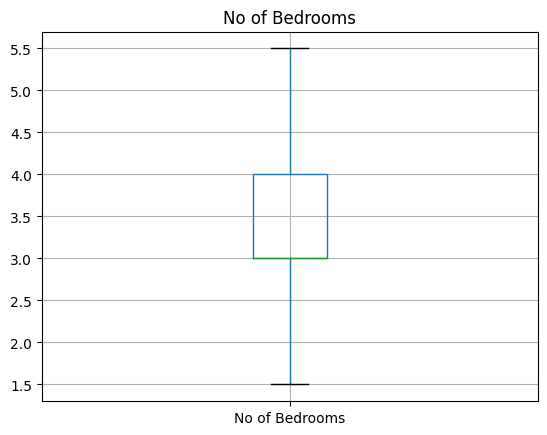

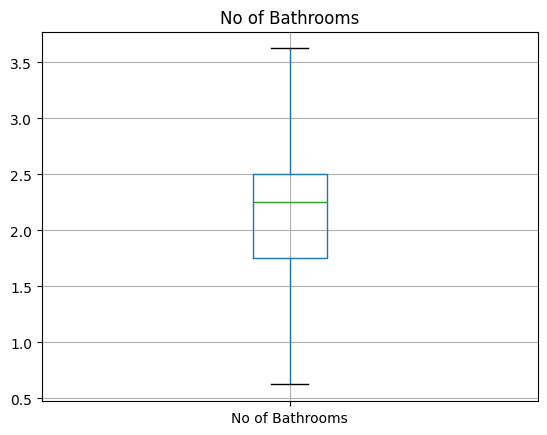

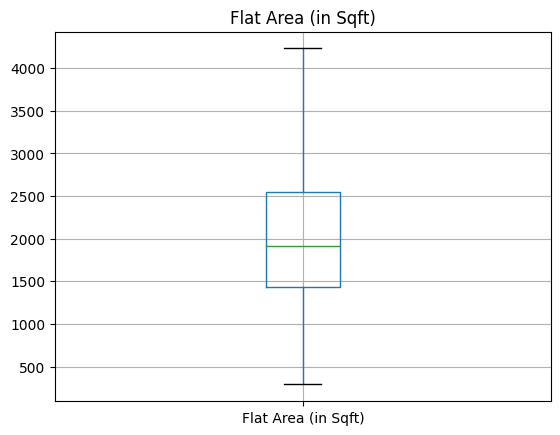

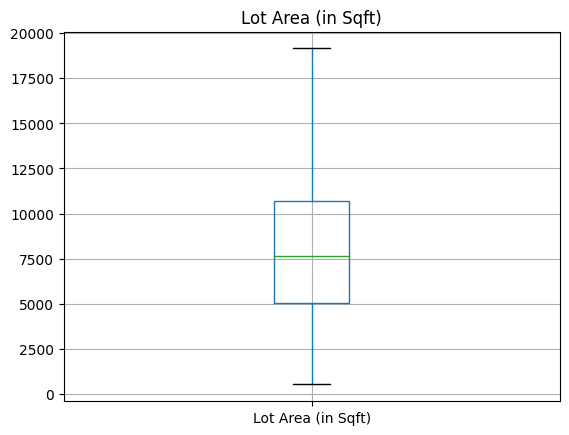

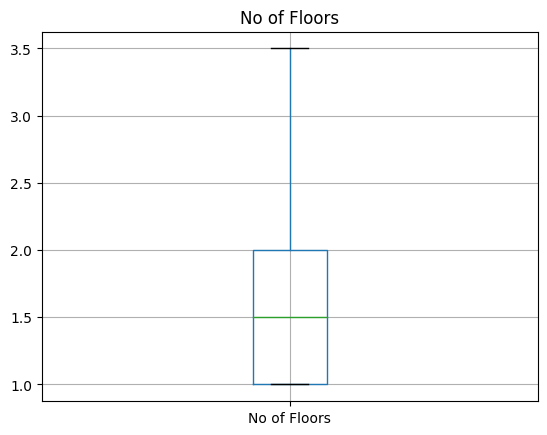

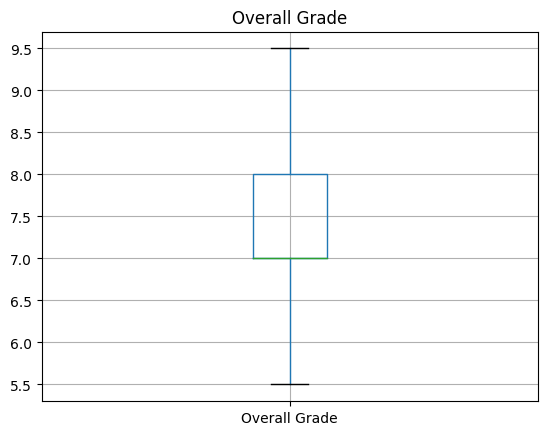

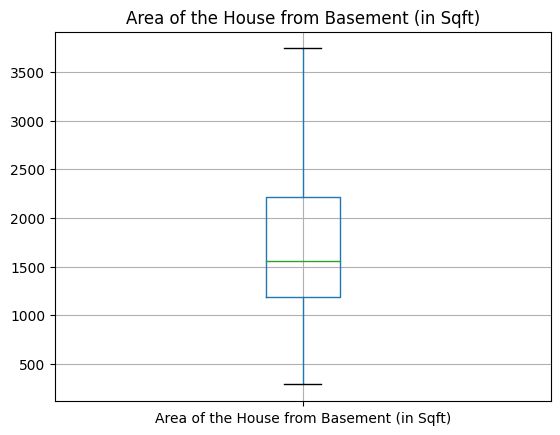

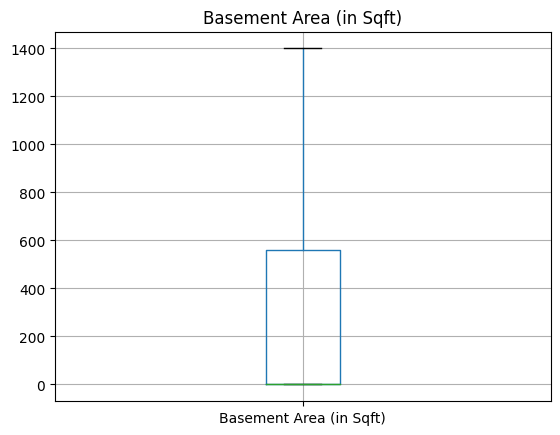

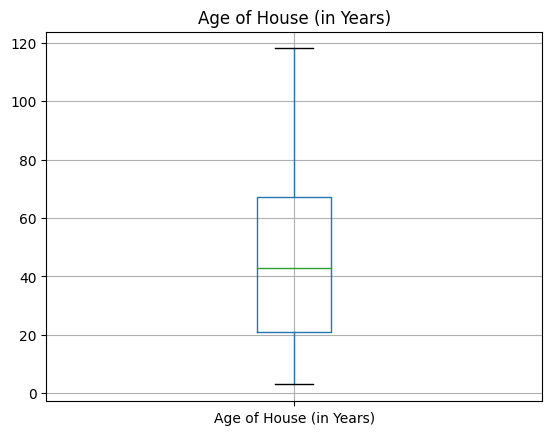

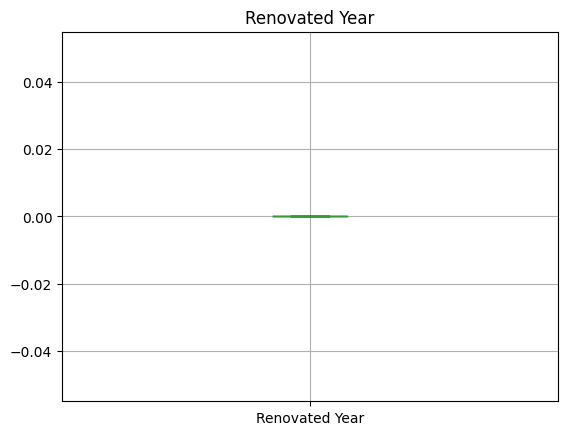

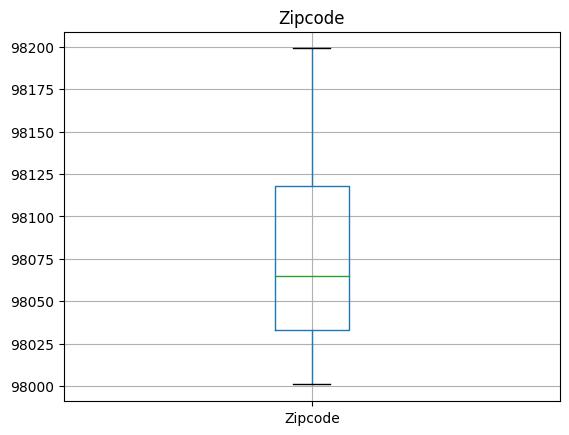

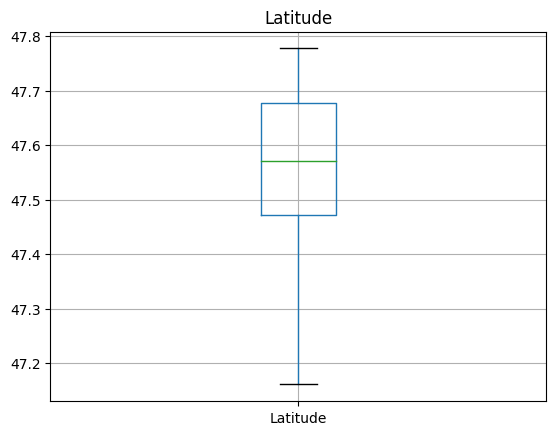

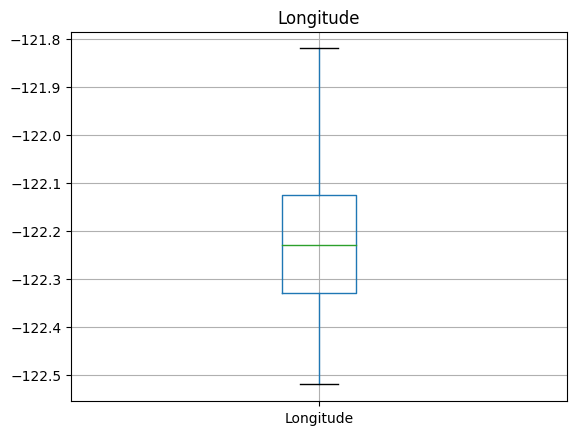

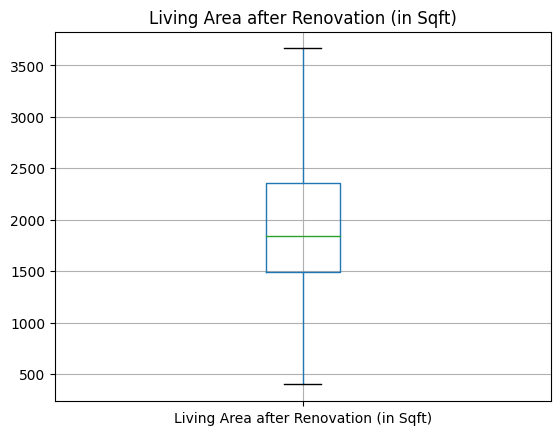

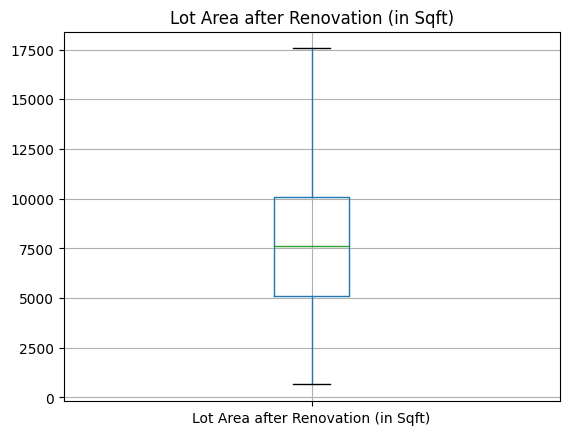

In [ ]:
for column in data.select_dtypes(include=['number']):
    plt.figure()
    data.boxplot([column])
    plt.title(column)

In [ ]:
data1 =data.copy()
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,Fair,7.0,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,Fair,7.0,2170.0,400,67,0,98125.0,47.7210,-122.319,1690.0,7639.0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,Fair,6.0,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,Excellent,7.0,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,Fair,8.0,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
condition = ['No','Yes']
oe = OrdinalEncoder(categories=[condition])
data['Waterfront View']=oe.fit_transform(data[['Waterfront View']])
data.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,Fair,7.0,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,Fair,7.0,2170.0,400,67,0,98125.0,47.7210,-122.319,1690.0,7639.0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,Fair,6.0,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,Excellent,7.0,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,0.0,Fair,8.0,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
House_condition=['Bad','Okay','Fair','Good','Excellent']
oe=OrdinalEncoder(categories=[House_condition])
data1['Condition of the House']=oe.fit_transform(data1[['Condition of the House']])
data1.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3.0,1.00,1180.0,5650.0,1.0,No,2.0,7.0,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,14 December 2017,538000.0,3.0,2.25,2570.0,7242.0,2.0,No,2.0,7.0,2170.0,400,67,0,98125.0,47.7210,-122.319,1690.0,7639.0
2,15 February 2016,180000.0,2.0,1.00,770.0,10000.0,1.0,No,2.0,6.0,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0
3,14 December 2017,604000.0,4.0,3.00,1960.0,5000.0,1.0,No,4.0,7.0,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000.0
4,15 February 2016,510000.0,3.0,2.00,1680.0,8080.0,1.0,No,2.0,8.0,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503.0


In [ ]:

from sklearn.preprocessing import MinMaxScaler
for column in data1.select_dtypes(include=['number']):
  mms=MinMaxScaler()
  data1[column]=mms.fit_transform(data1[[column]])
data1.head()

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,0.139308,0.375,0.125000,0.225888,0.275325,0.0,No,0.5,0.375,0.257971,0.000000,0.521739,0.0,0.893939,0.568303,0.375089,0.288120,0.295685
1,14 December 2017,0.439071,0.375,0.541667,0.578680,0.360767,0.4,No,0.5,0.375,0.544928,0.285714,0.556522,0.0,0.626263,0.908281,0.286328,0.395285,0.413332
2,15 February 2016,0.099573,0.125,0.125000,0.121827,0.508788,0.0,No,0.5,0.125,0.139130,0.000000,0.713043,0.0,0.136364,0.935667,0.409449,0.710655,0.438352
3,14 December 2017,0.501660,0.625,0.791667,0.423858,0.240440,0.0,No,1.0,0.375,0.220290,0.650000,0.434783,0.0,0.681818,0.583860,0.180387,0.294244,0.257238
4,15 February 2016,0.412518,0.375,0.458333,0.352792,0.405743,0.0,No,0.5,0.625,0.402899,0.000000,0.243478,0.0,0.368687,0.739426,0.678597,0.428965,0.405288
